### 01.Aurelia_violin_statistics

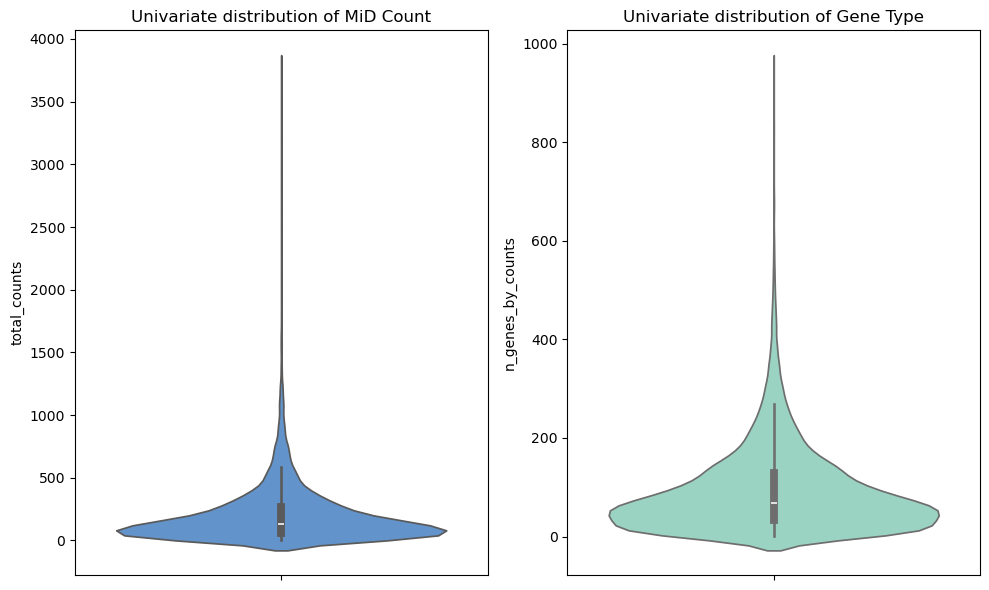

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Max:3791, Q1:61, Q2:135, Q3:270, Min:1
sns.violinplot(
    data=st_AureliaMargin.obs,
    y="total_counts",
    inner="box",
    ax=axes[0],
    color="#5192DB"
)
axes[0].set_title("Univariate distribution of MiD Count")

# Max:948, Q1:33, Q2:68, Q3:128, Min:1
sns.violinplot(
    data=st_AureliaMargin.obs,
    y="n_genes_by_counts",
    inner="box",
    ax=axes[1],
    color="#92DCC6"
)
axes[1].set_title("Univariate distribution of Gene Type")

plt.tight_layout()

output_path = "./Figures/01.Aurelia_violin_statistics.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()

### 02.Aurelia_tree_leiden

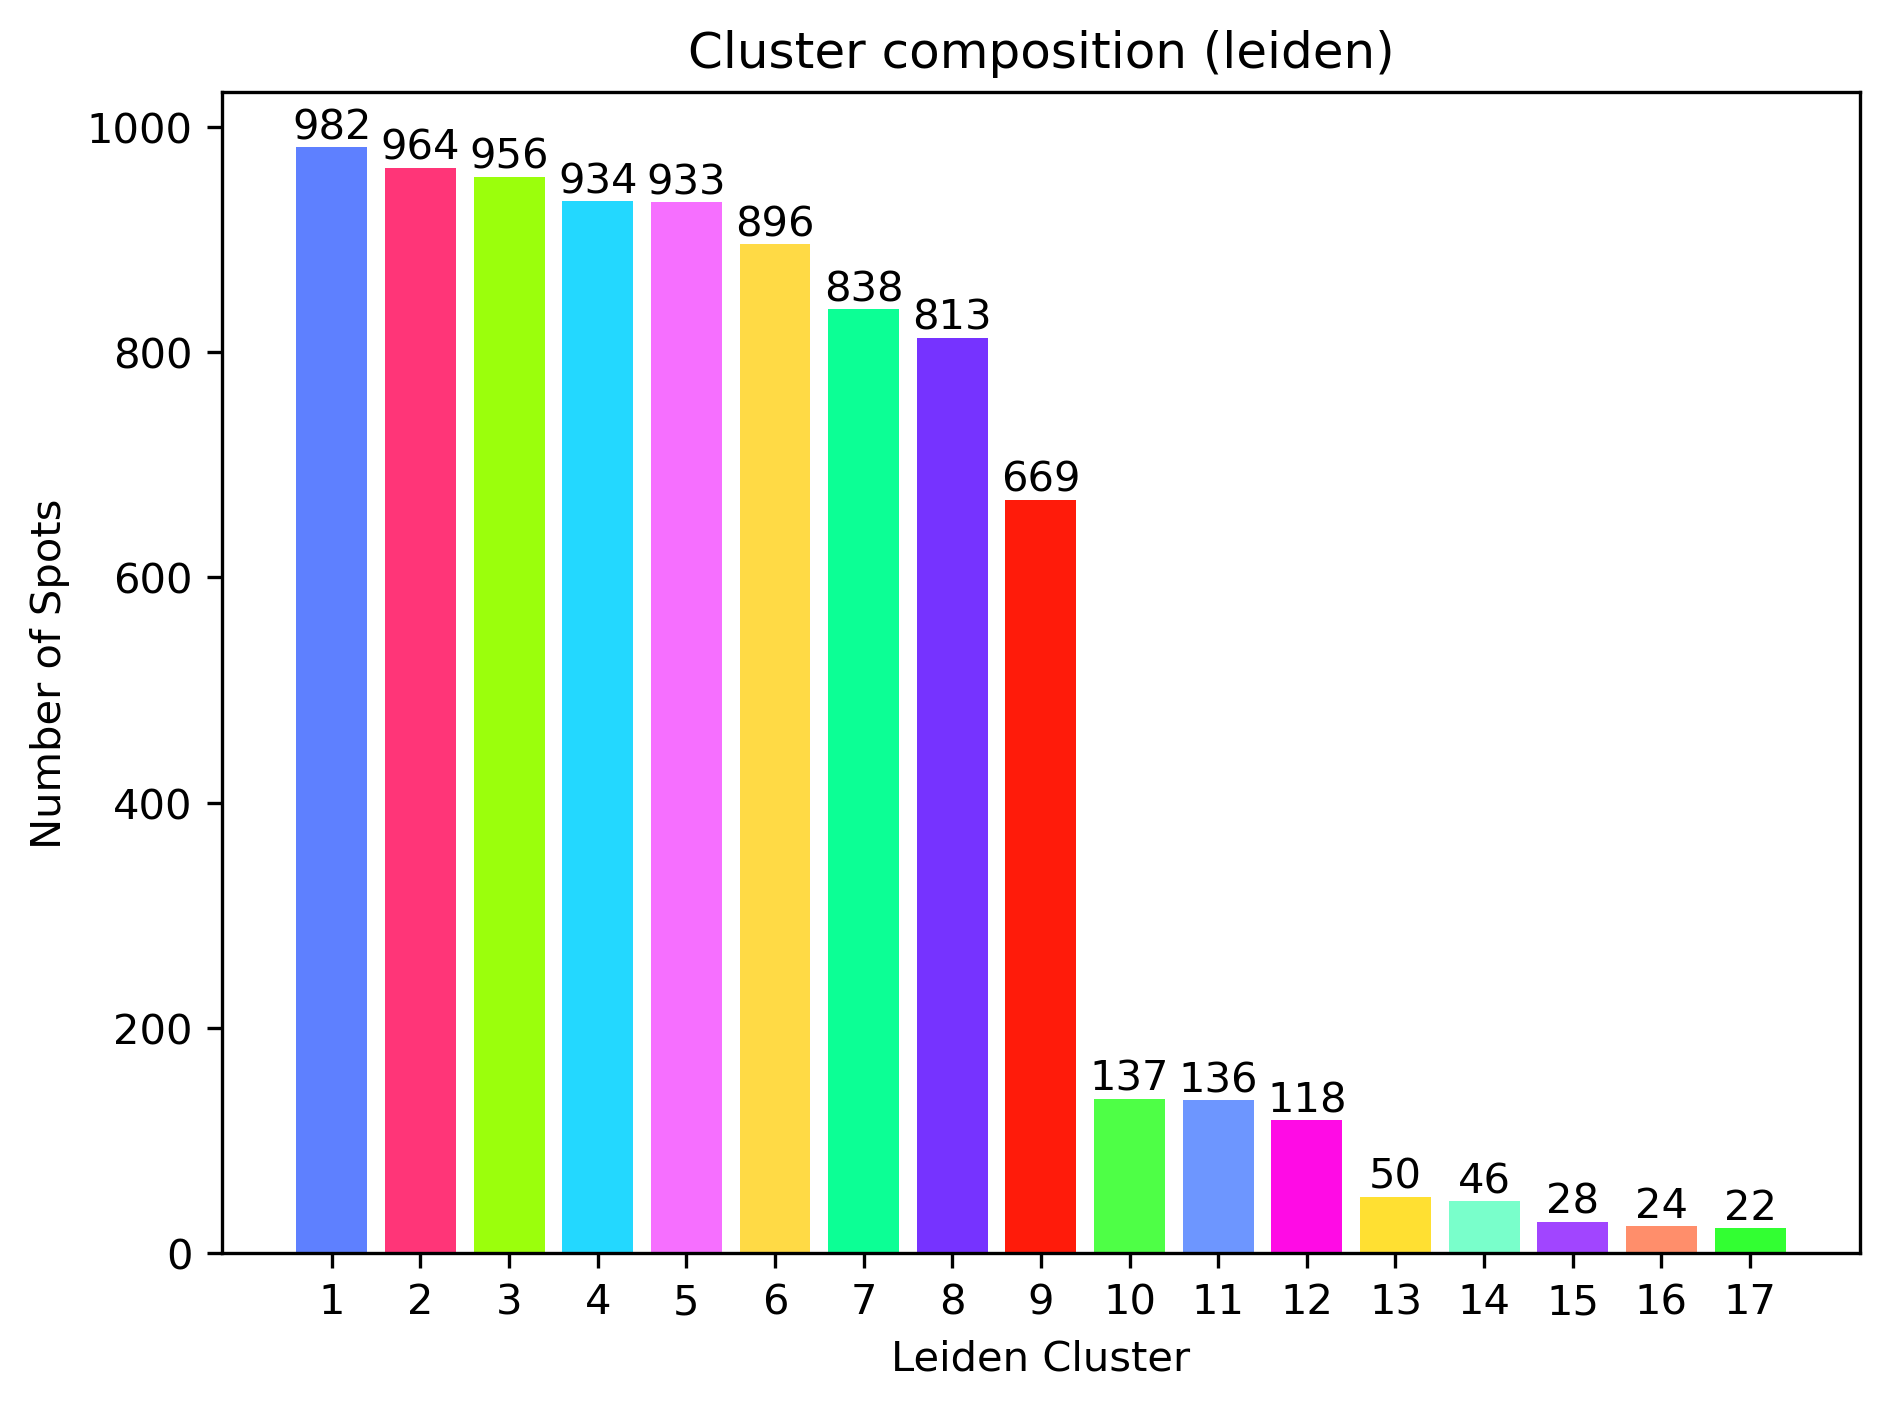

In [2]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

# 1. 统计 Leiden cluster 数量
counts = st_AureliaMargin.obs['leiden'].value_counts().sort_index()

# 2. 提取 Scanpy 生成的 leiden 颜色（按分类顺序）
leiden_categories = st_AureliaMargin.obs['leiden'].cat.categories
leiden_colors = st_AureliaMargin.uns['leiden_colors']

# 3. 将 Index 与颜色对应
color_map = dict(zip(leiden_categories, leiden_colors))

# 4. DataFrame
df = pd.DataFrame({
    # "Cluster": ["cluster" + str(i) for i in counts.index],
    "Cluster": [str(i) for i in counts.index],
    "Leiden": counts.index,
    "Count": counts.values
})

# 5. 绘图
fig, ax = plt.subplots(dpi=300)
bars = ax.bar(
    df["Cluster"],
    df["Count"],
    color=[color_map[str(i)] for i in df["Leiden"]]
)

# 6. 显示数值
ax.bar_label(bars, fmt='%d')

# 7. 轴、标题、倾斜 45 度
ax.set_title("Cluster composition (leiden)")
ax.set_xlabel("Leiden Cluster")
ax.set_ylabel("Number of Spots")

plt.tight_layout()

output_path = "./Figures/02.Aurelia_tree_leiden.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()

### 03.Aurelia_tree_hierarchical

['14' '15' '16' '7' '9' '1' '2' '8' '13' '12' '10' '3' '4' '17' '5' '6'
 '11']
[1 1 2 2 3 3 1 1 1 2 3 2 2 1 1 1 3]


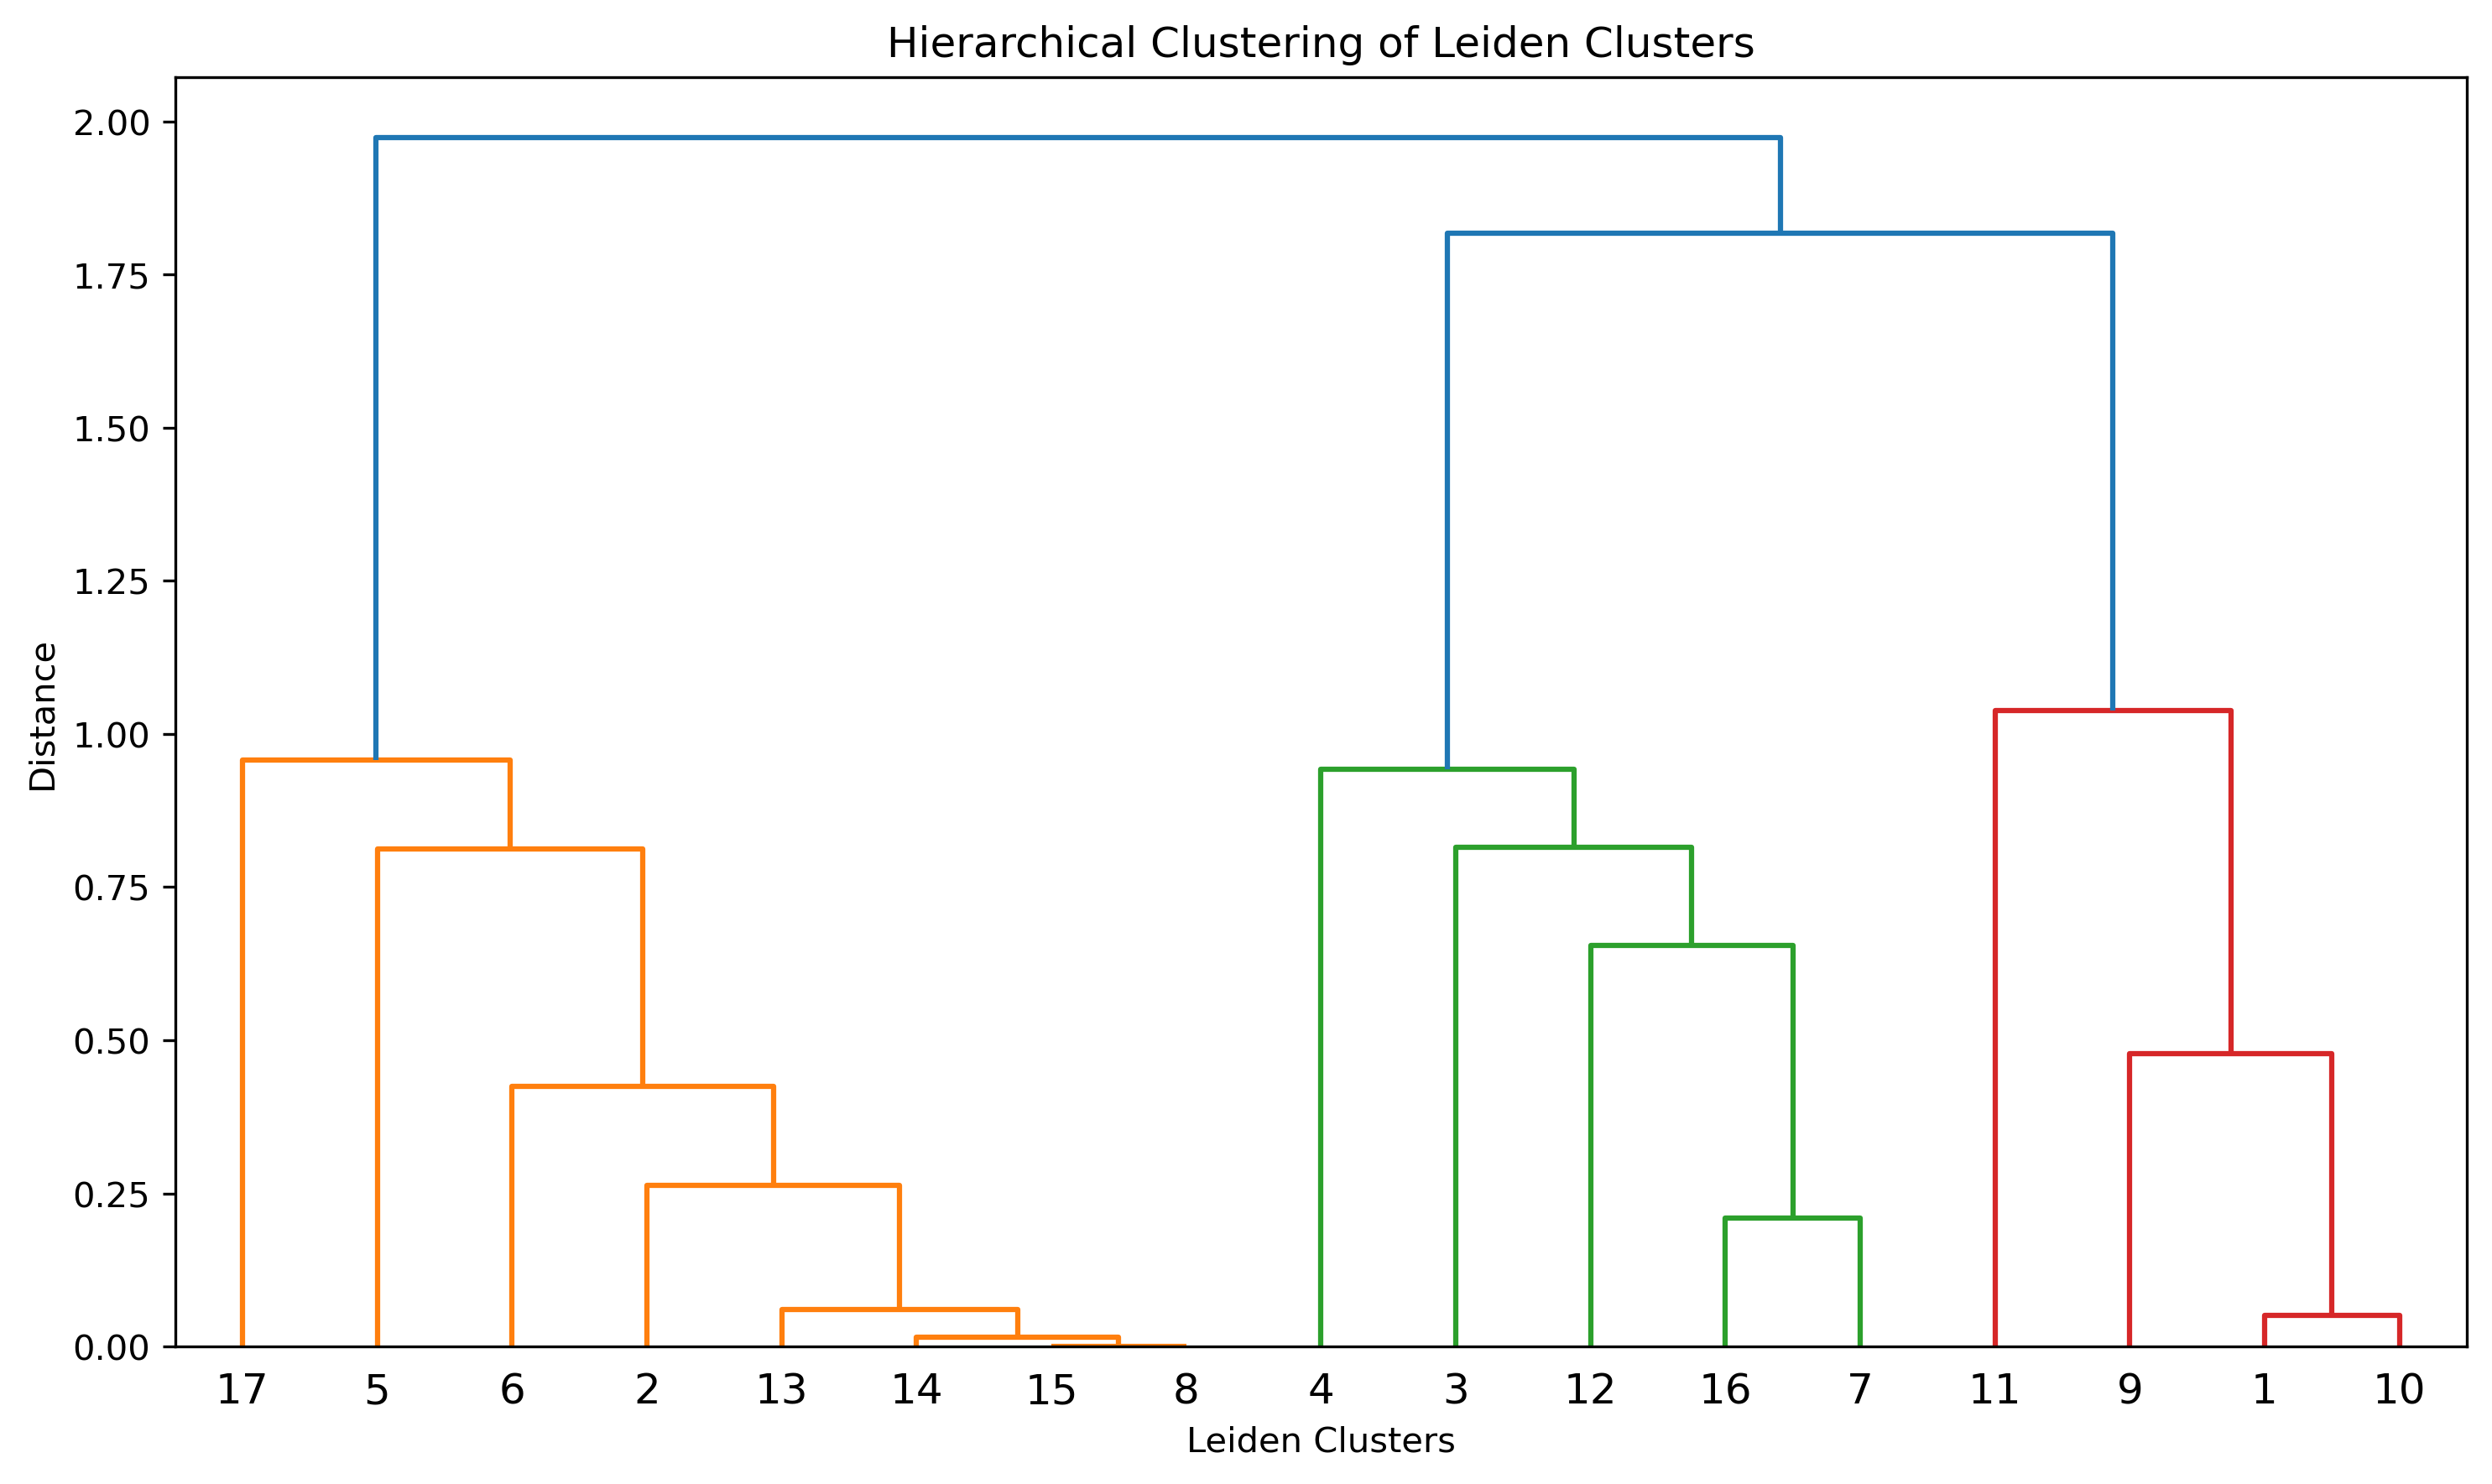

In [3]:
import scanpy as sc
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import fcluster, dendrogram
import matplotlib.pyplot as plt

# Load data
st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

# Extract dendrogram info
linkage = st_AureliaMargin.uns["dendrogram_leiden"]["linkage"]
leiden_order = st_AureliaMargin.uns["dendrogram_leiden"]["categories_ordered"]
print(leiden_order)

# Generate super clusters
super_cluster_labels = fcluster(linkage, 3, criterion="maxclust")
print(super_cluster_labels)

# --------------------------
# Plot dendrogram (white background)
# --------------------------
fig, ax = plt.subplots(figsize=(10, 6), dpi=300, facecolor="white")
ax.set_facecolor("white")  # panel background

dendrogram(
    linkage,
    labels=leiden_order,
    orientation='top',
    color_threshold=None
)

ax.set_title("Hierarchical Clustering of Leiden Clusters", color="black")
ax.set_xlabel("Leiden Clusters", color="black")
ax.set_ylabel("Distance", color="black")

# Set tick colors to black
ax.tick_params(colors="black")

# Set frame colors to black
for spine in ax.spines.values():
    spine.set_color("black")

plt.tight_layout()

output_path = "./Figures/03.Aurelia_tree_hierarchical.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()


### 04.Aurelia Spots Spatial

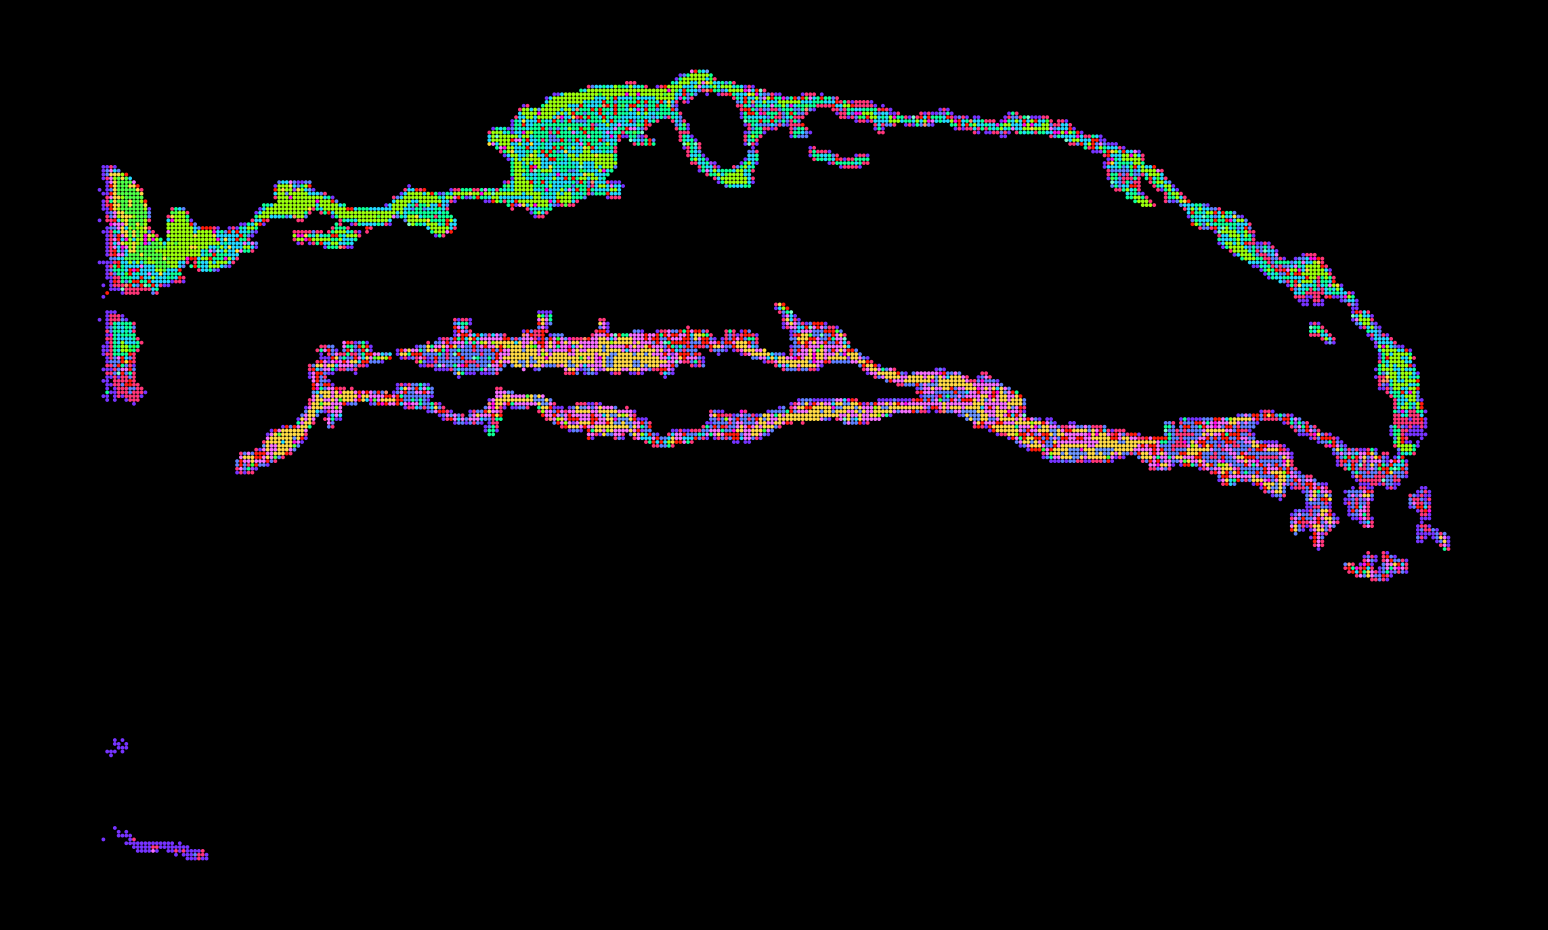

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.spatial(
    st_AureliaMargin,
    color="leiden",
    spot_size=50,
    img=None,           # ⭐ 不显示组织图，只显示点
    legend_loc=None,    # ⭐ 不显示图例（可选）
    frameon=False,      # ⭐ 去掉边框
    ax=ax,
    show=False
)

# # 黑色背景
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# 去掉坐标轴标签
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

output_path = "./Figures/04.Aurelia_Spatial_leiden.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


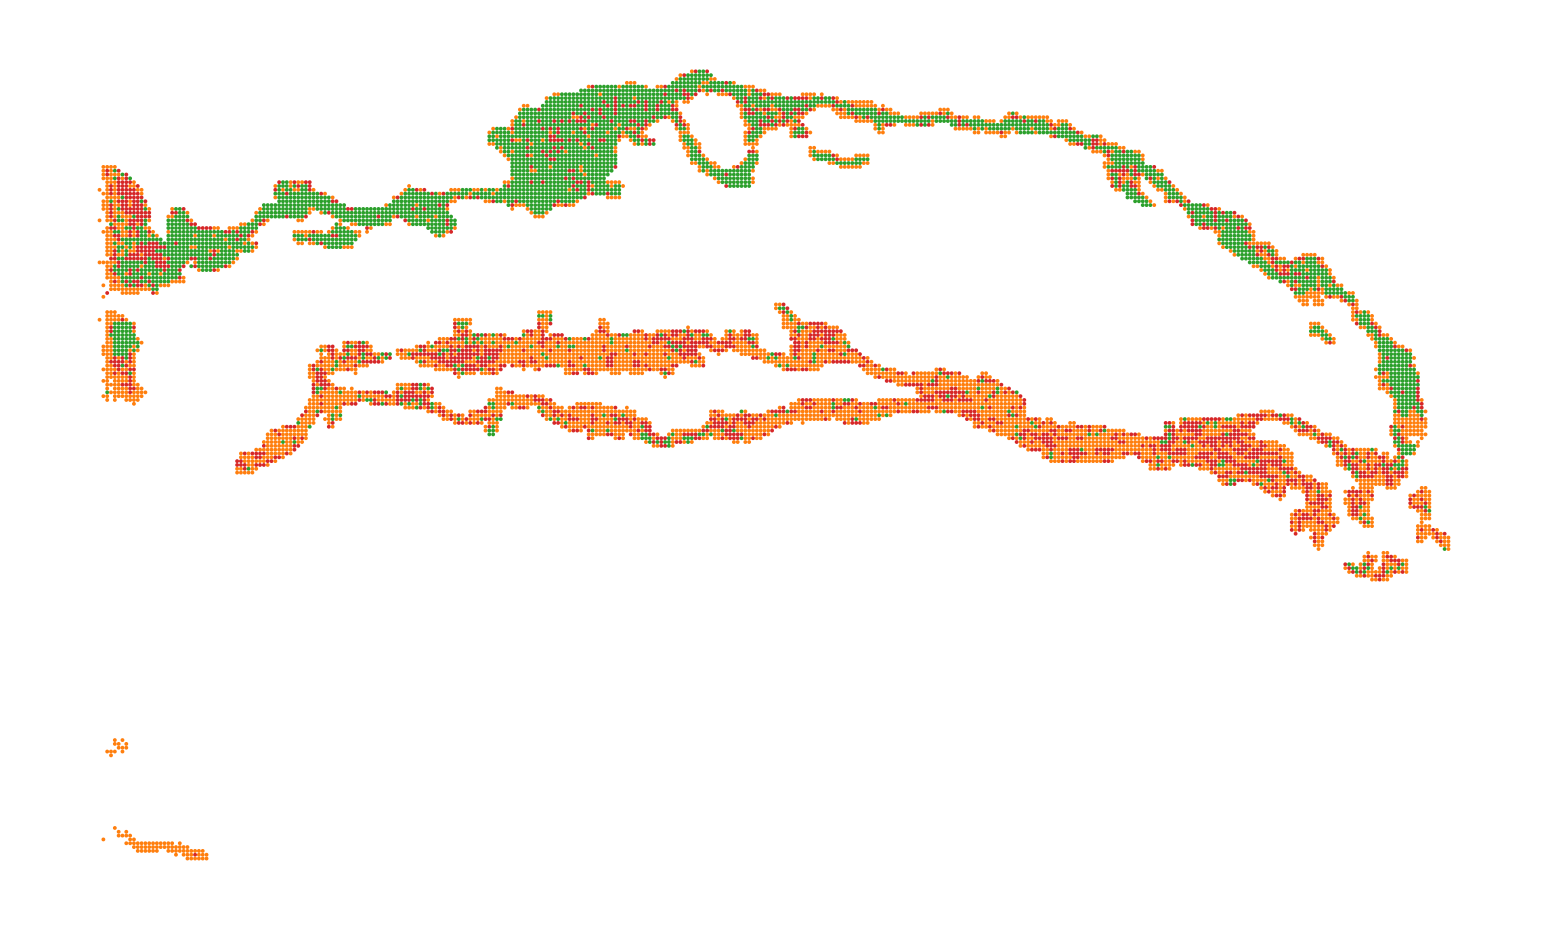

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.spatial(
    st_AureliaMargin,
    color="cluster_annos",
    spot_size=50,
    img=None,           # ⭐ 不显示组织图，只显示点
    legend_loc=None,    # ⭐ 不显示图例（可选）
    frameon=False,      # ⭐ 去掉边框
    ax=ax,
    show=False
)

# 去掉坐标轴标签
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

output_path = "./Figures/04.Aurelia_Spatial_cluster_annos.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


### 05.Aurelia and Clytia UMAP

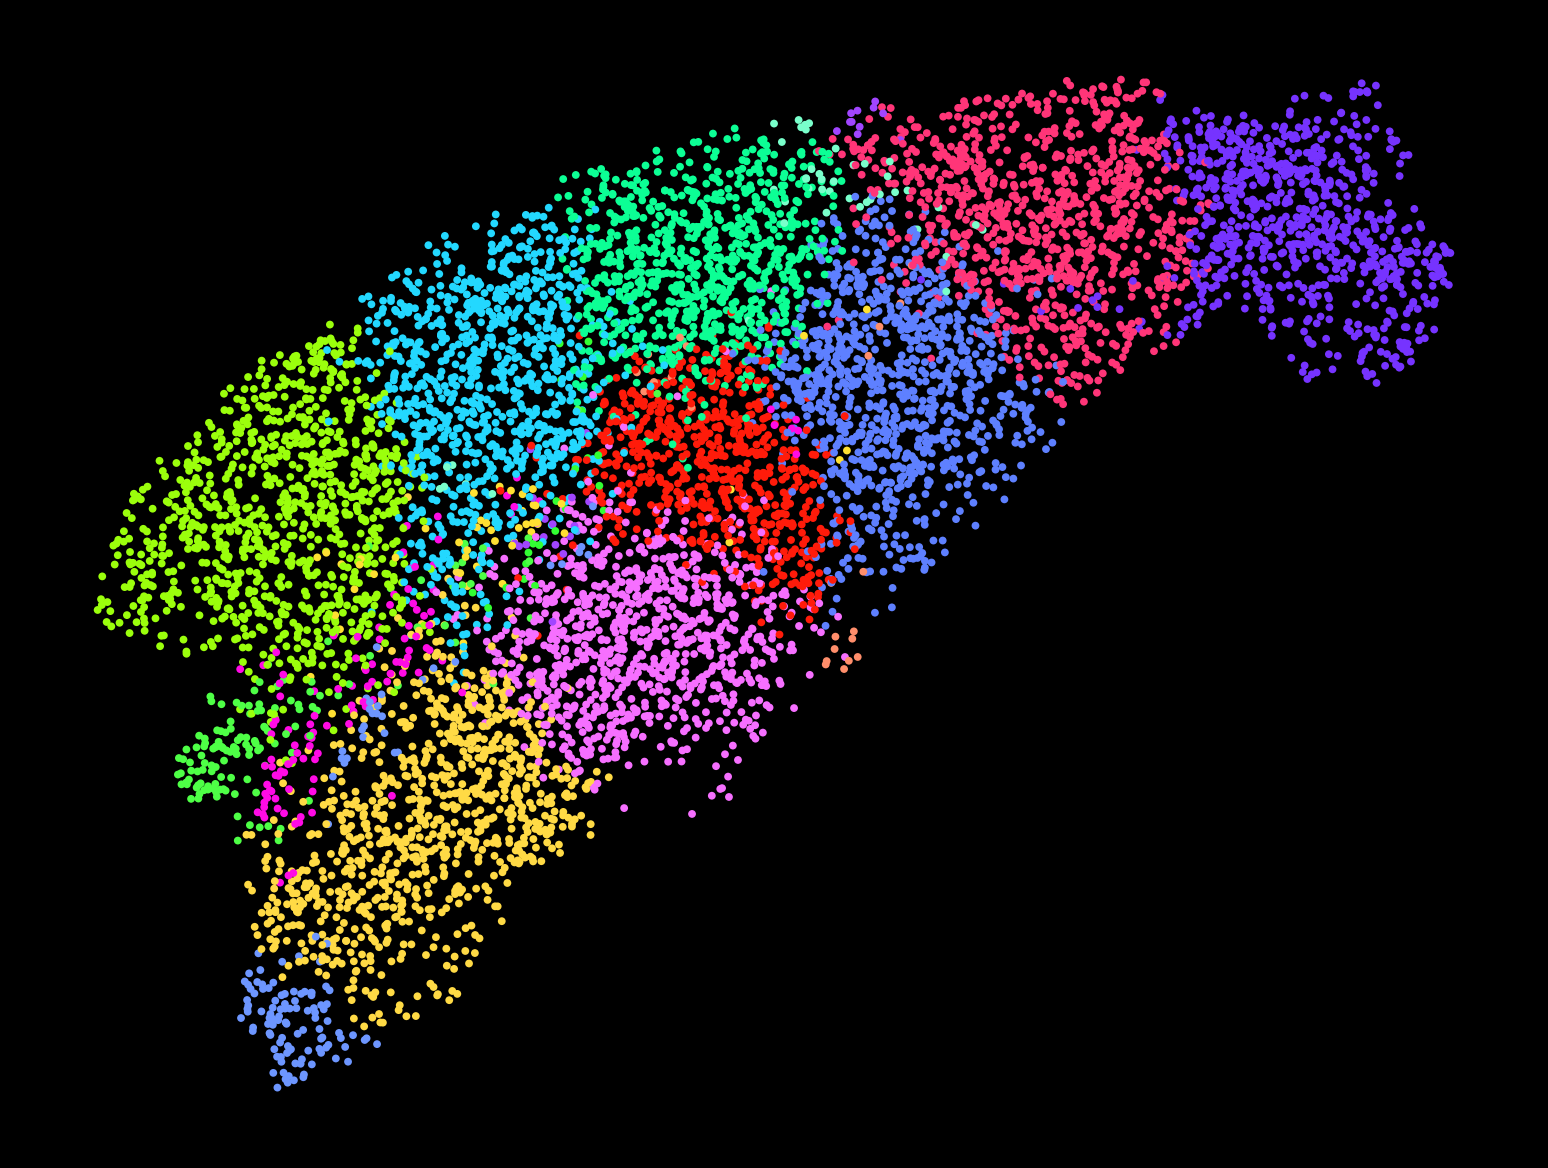

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.umap(
    st_AureliaMargin,
    color='leiden',
    title='Ac9-3 UMAP projection of spots (bin50, leiden)',
    ax=ax,
    show=False,
    legend_loc=None,   # ⭐ 不显示图例
    frameon=False      # ⭐ 去掉坐标轴边框
)

# 黑色背景
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# ⭐ 去掉坐标刻度与标签、标题
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

output_path = "./Figures/05.Aurelia_UMAP_leiden.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


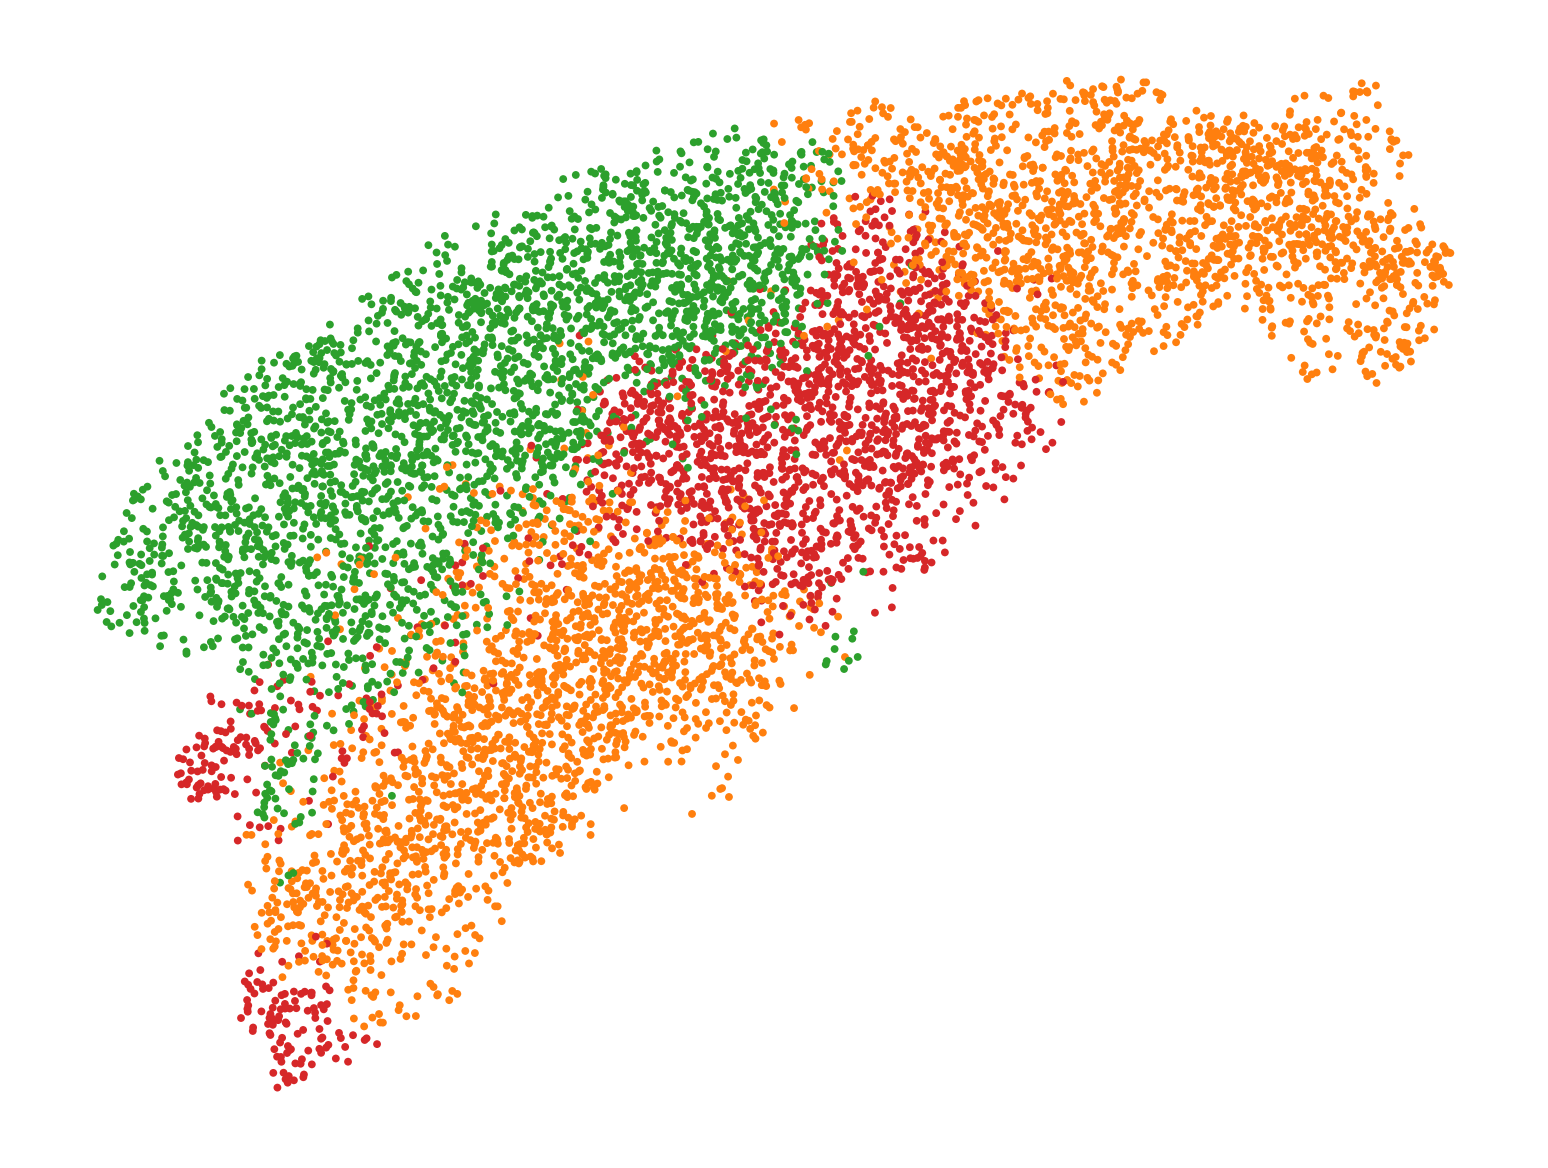

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

st_AureliaMargin = sc.read_h5ad("./Figures/AureliaMargin.annos.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.umap(
    st_AureliaMargin,
    color='cluster_annos',
    title='Ac9-3 UMAP projection of spots (bin50, leiden)',
    ax=ax,
    show=False,
    legend_loc=None,   # ⭐ 不显示图例
    frameon=False      # ⭐ 去掉坐标轴边框
)

# ⭐ 去掉坐标刻度与标签、标题
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

output_path = "./Figures/05.Aurelia_UMAP_cluster_annos.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


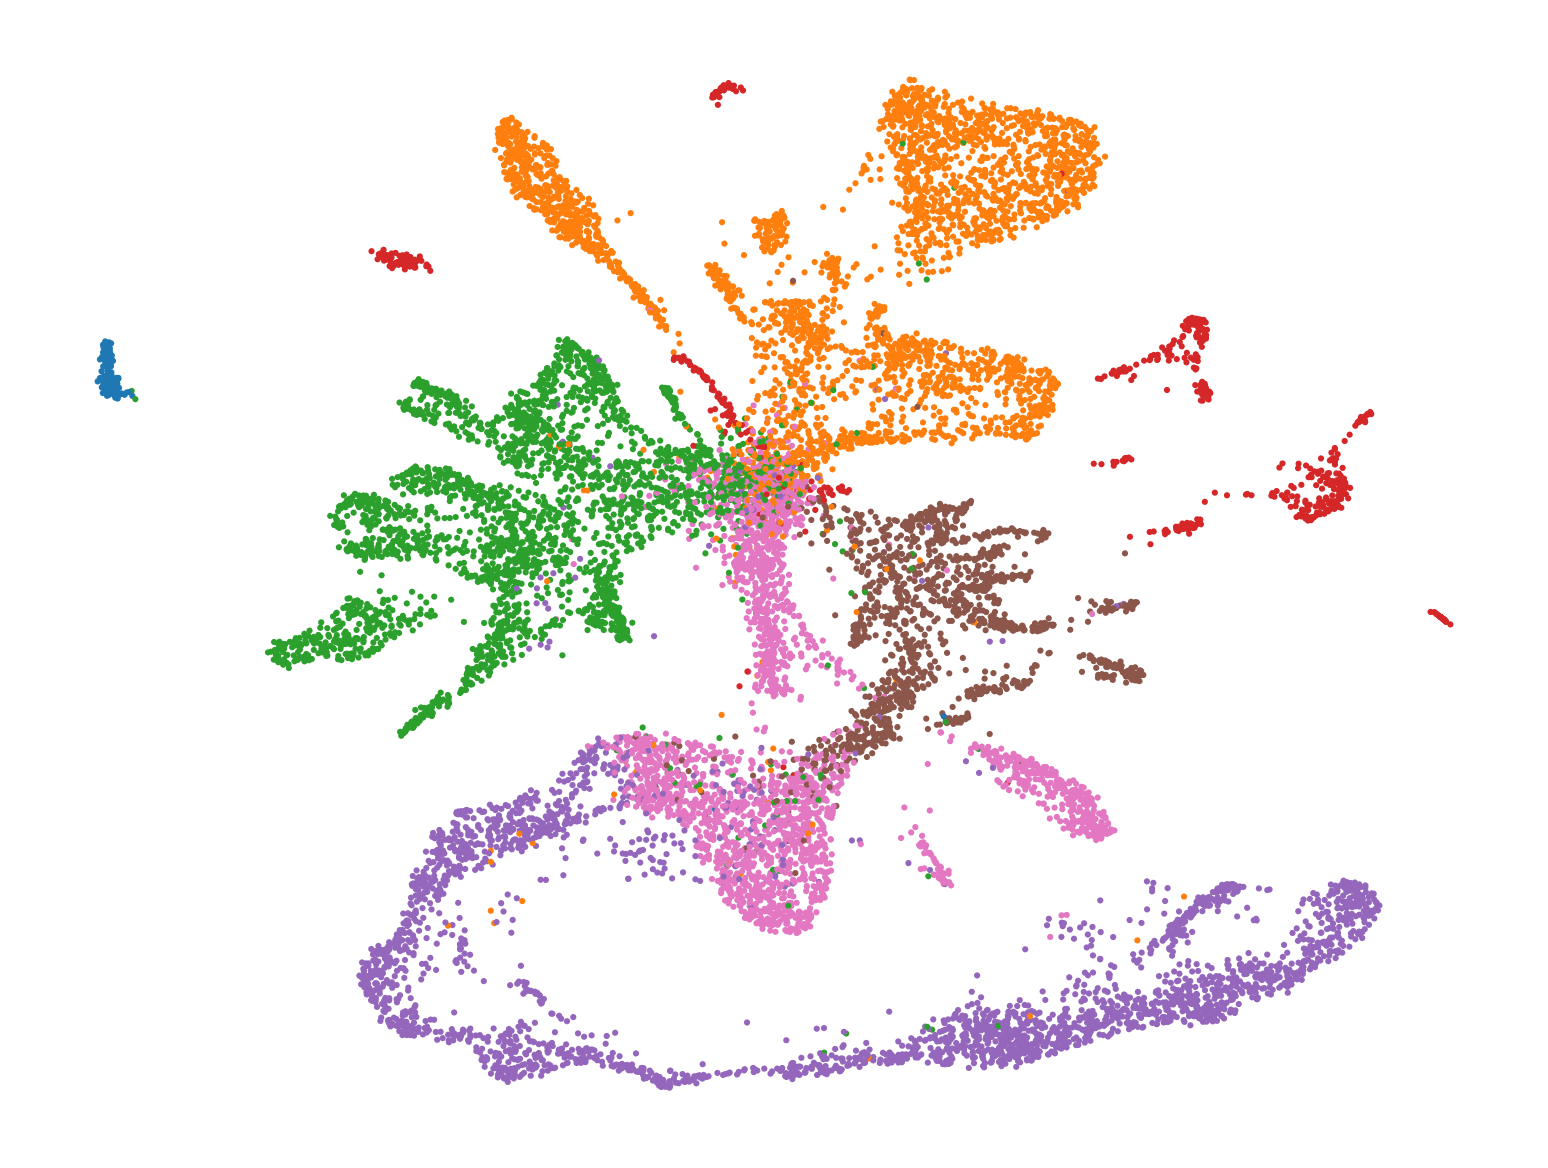

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

st_Clytia = sc.read_h5ad("./Data/ClytiaMedusa.sc.normalized.h5ad")

fig, ax = plt.subplots(dpi=300)

sc.pl.umap(
    st_Clytia,
    color='annos',
    title='Clytia UMAP',
    ax=ax,
    show=False,
    legend_loc=None,   # ⭐ 不显示图例
    frameon=False      # ⭐ 去掉坐标轴边框
)

# ⭐ 去掉坐标刻度与标签、标题
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

output_path = "./Figures/05.Clytia_UMAP_cluster_annos.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()


### 06.OGs Markers UMAP (Aurelia and Clytia)

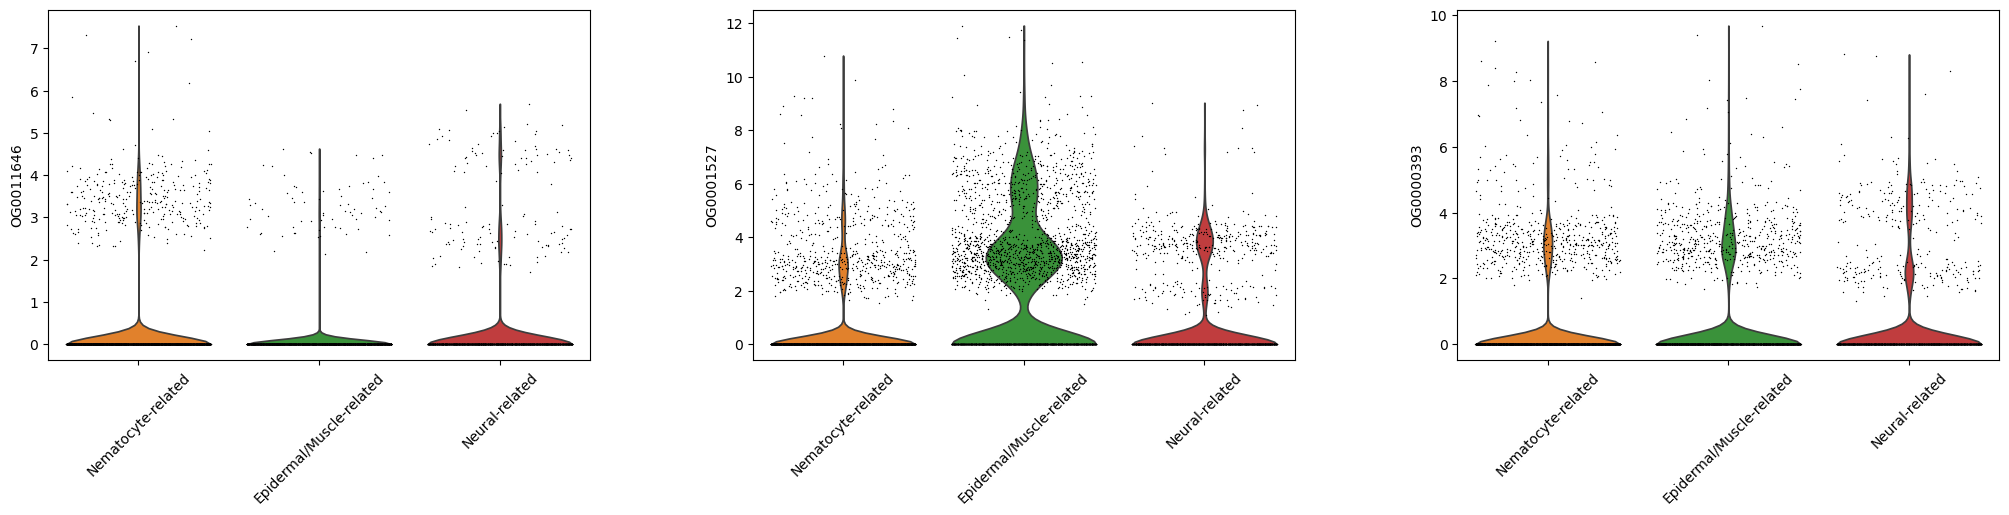

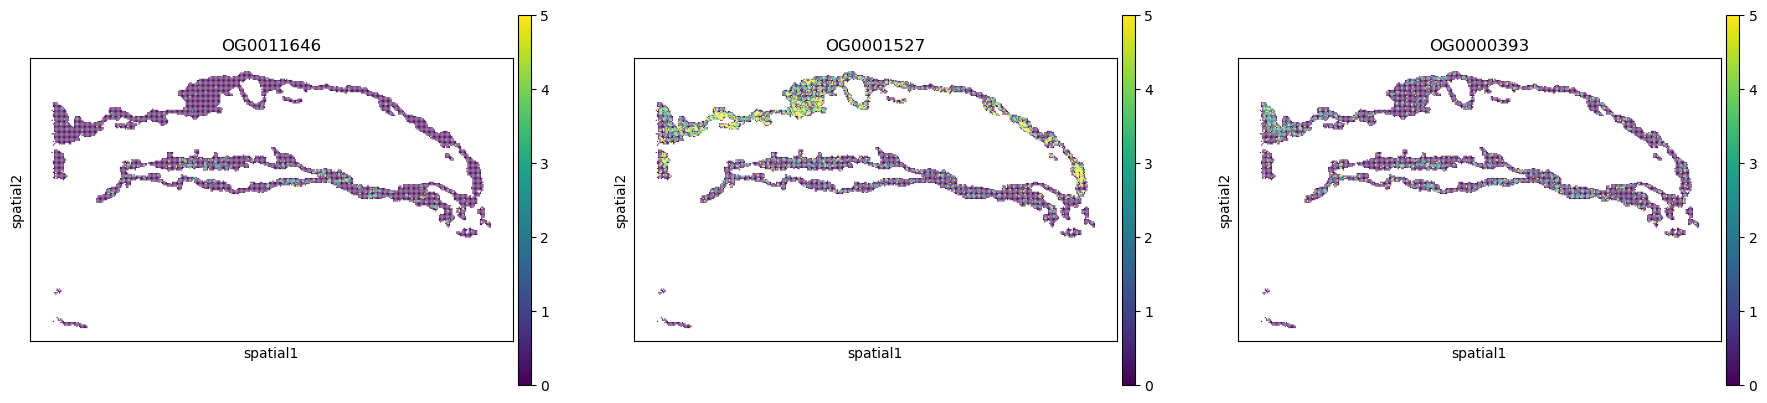

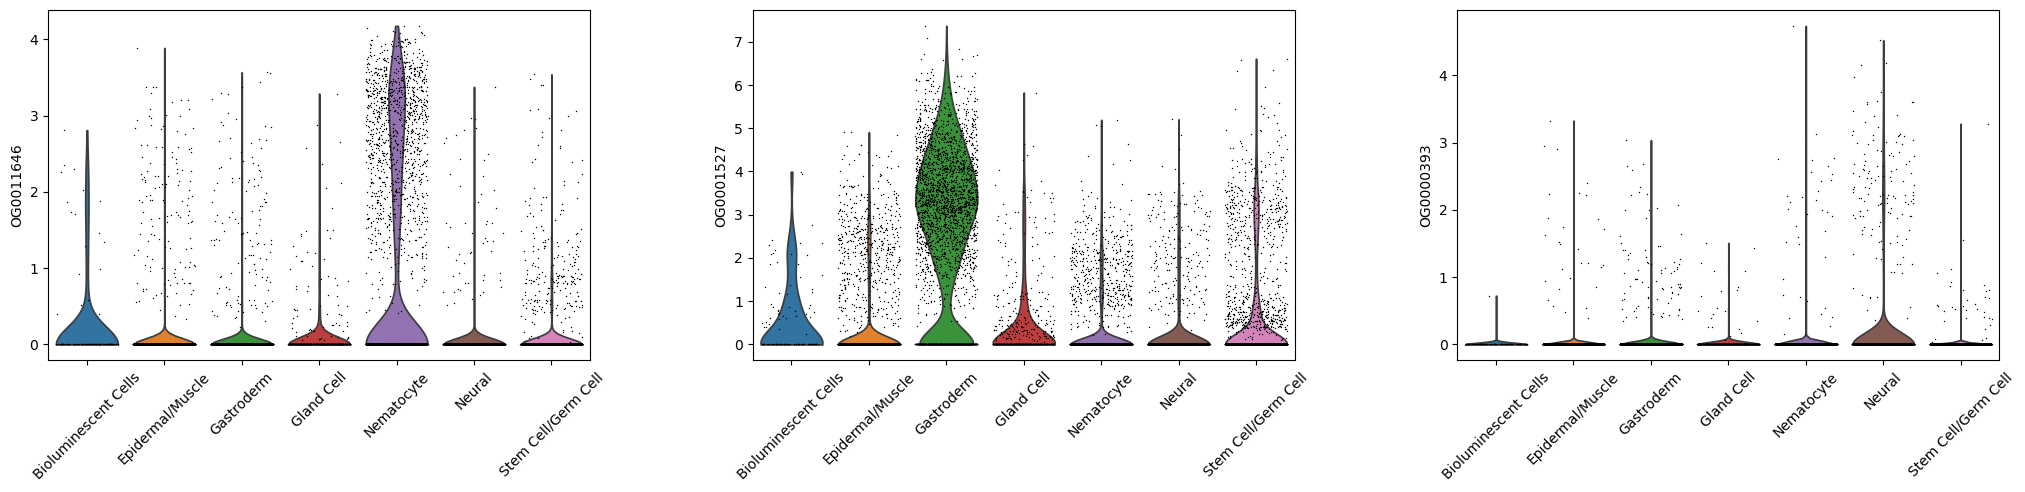

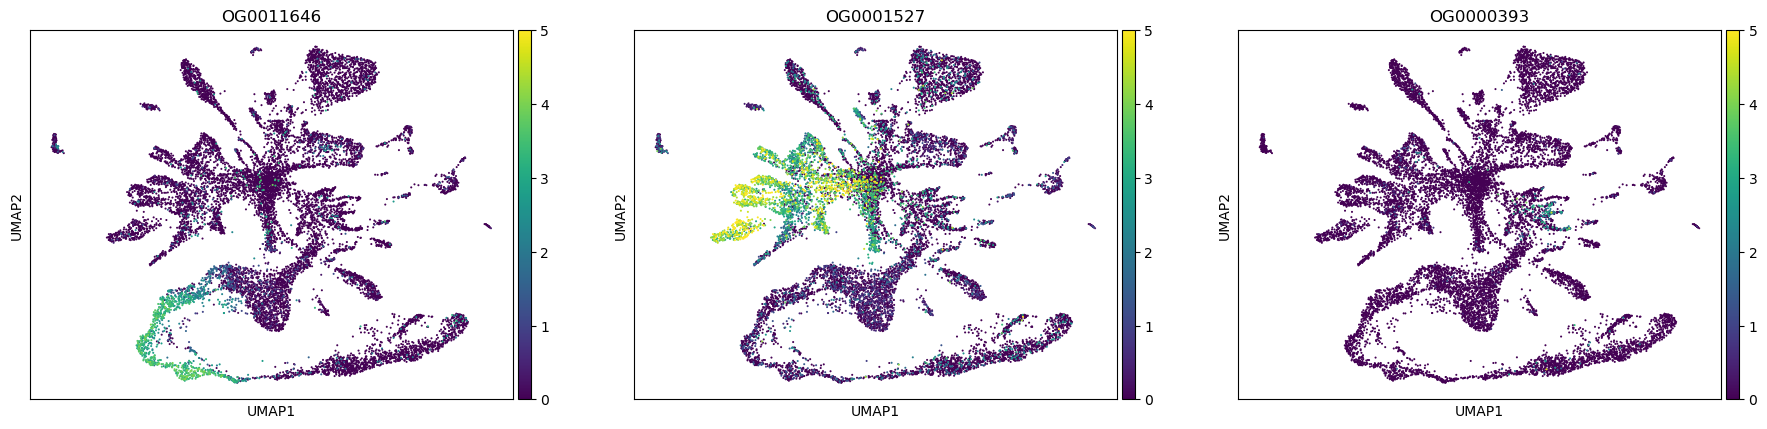

In [9]:
import scanpy as sc

st_AureliaMargin_og = sc.read_h5ad("./Figures/AureliaMarginOGs.annos.h5ad")
sc_Clytia_og = sc.read_h5ad("./Data/ClytiaMedusa.sc.OGs.normalized.h5ad")

final_markers = ['OG0011646', 'OG0001527', 'OG0000393']
sc.pl.violin(st_AureliaMargin_og, keys=final_markers, groupby="cluster_annos", jitter=0.4, rotation=45, stripplot=True)
sc.pl.spatial(st_AureliaMargin_og, color=final_markers, vmin=0, vmax=5, spot_size=50)
sc.pl.violin(sc_Clytia_og, keys=final_markers, groupby="annos", jitter=0.4, rotation=45, stripplot=True)
sc.pl.umap(sc_Clytia_og, color=final_markers, vmin=0, vmax=5)

In [10]:
final_markers = ['OG0011646', 'OG0001527', 'OG0000393']

# Loop through each OG
for og in final_markers:
    print(f"Plotting marker: {og}")

    # -----------------------------
    # 1. Aurelia: Violin
    # -----------------------------
    ax = sc.pl.violin(
        st_AureliaMargin_og,
        keys=[og],
        groupby="cluster_annos",
        jitter=0.4,
        rotation=45,
        stripplot=True,
        show=False
    )
    fig = ax.figure
    fig.savefig(f"./Figures/06.Aurelia_violin_{og}.pdf", dpi=300, bbox_inches="tight")
    plt.close(fig)

    # -----------------------------
    # 2. Aurelia: Spatial
    # -----------------------------
    fig, ax = plt.subplots(dpi=300)
    sc.pl.spatial(
        st_AureliaMargin_og,
        color=[og],
        vmin=0, vmax=5,
        spot_size=50,
        img=None,           # ⭐ 不显示组织图，只显示点
        legend_loc=None,    # ⭐ 不显示图例（可选）
        frameon=False,      # ⭐ 去掉边框
        ax=ax,
        show=False
    )
    # 去掉坐标轴标签
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("")
    fig.savefig(f"./Figures/06.Aurelia_spatial_{og}.pdf", dpi=300, bbox_inches="tight")
    plt.close(fig)

    # -----------------------------
    # 3. Clytia: Violin
    # -----------------------------
    ax = sc.pl.violin(
        sc_Clytia_og,
        keys=[og],
        groupby="annos",
        jitter=0.4,
        rotation=45,
        stripplot=True,
        show=False
    )
    fig = ax.figure
    fig.savefig(f"./Figures/06.Clytia_violin_{og}.pdf", dpi=300, bbox_inches="tight")
    plt.close(fig)

    # -----------------------------
    # 4. Clytia: UMAP
    # -----------------------------
    fig, ax = plt.subplots(dpi=300)

    sc.pl.umap(
        sc_Clytia_og,
        color=[og],
        vmin=0, vmax=5,
        ax=ax,
        show=False,
        legend_loc=None,   # ⭐ 不显示图例
        frameon=False      # ⭐ 去掉坐标轴边框
    )

    # ⭐ 去掉坐标刻度与标签、标题
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("")
    fig.savefig(f"./Figures/06.Clytia_umap_{og}.pdf", dpi=300, bbox_inches="tight")
    plt.close(fig)

print("All individual OG marker plots saved (dpi=300).")


Plotting marker: OG0011646
Plotting marker: OG0001527
Plotting marker: OG0000393
All individual OG marker plots saved (dpi=300).


### 07.Aurelia_Dotplot_rank_OGs

Saved: ./Figures/07.Aurelia_rankgenes_dotplot.pdf


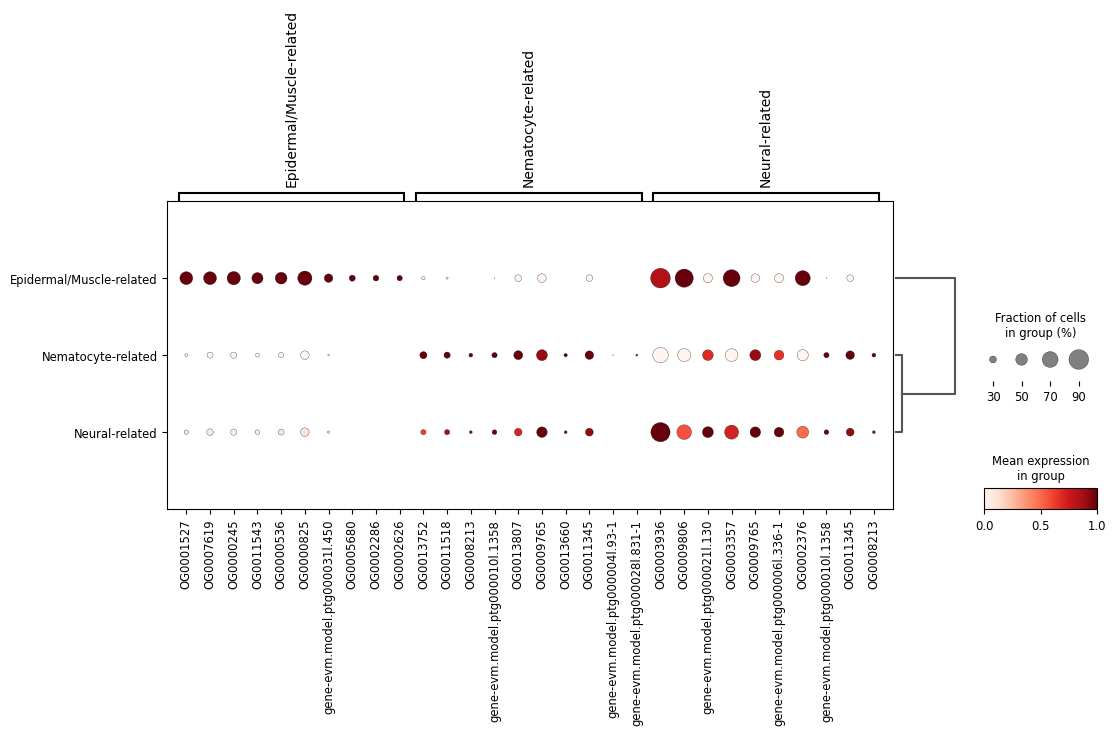

In [12]:
import scanpy as sc

st_AureliaMargin_og = sc.read_h5ad("./Figures/AureliaMarginOGs.annos.h5ad")

# Generate dotplot and return the FIGURE directly
fig = sc.pl.rank_genes_groups_dotplot(
    st_AureliaMargin_og,
    groupby="cluster_annos",
    n_genes=10,
    standard_scale="var",
    color_map="Reds",
    dot_max=0.9,
    dot_min=0.1,
    figsize=(12, 4),
    show=False,
    return_fig=True      # ⭐⭐ 必须加上这一行！ ⭐⭐
)

# Save figure
output_path = "./Figures/07.Aurelia_rankgenes_dotplot.pdf"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

print(f"Saved: {output_path}")